# Polishing and Analyzing Used Car Listings From eBay 

## Introduction
In this project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally [scraped](https://en.wikipedia.org/wiki/Web_scraping) and uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data). We've made a few modifications that cosidering only 50,000 data points from the orginal dataset for our analysis.

It is always a good to read the data dictionary before working on the project, which will give us a quick idea about each label details in our dataset. Below are the details on the same

* **dateCrawled** - When this ad was first crawled. All field-values are taken from this date.

* **name** - Name of the car.

* **seller** - Whether the seller is private or a dealer.

* **offerType** - The type of listing

* **price** - The price on the ad to sell the car.

* **abtest** - Whether the listing is included in an A/B test.

* **yearOfRegistration** - The year in which the car was first registered.

* **gearbox** - The transmission type.

* **powerPS** - The power of the car in PS.

* **model** - The car model name.

* **kilometer** - How many kilometers the car has driven.

* **monthOfRegistration** - The month in which the car was first registered.

* **fuelType** - What type of fuel the car uses.

* **brand** - The brand of the car.

* **notRepairedDamage** - If the car has a damage which is not yet repaired.

* **dateCreated** - The date on which the eBay listing was created.

* **nrOfPictures** - The number of pictures in the ad.

* **postalCode** - The postal code for the location of the vehicle.

* **lastSeenOnline** - When the crawler saw this ad last online.

The aim of this project is to clean and analyze the used car listings data.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [3]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [4]:
autos.info()# print the concise summary of a DataFrame
autos.head()# print the first five rows of a Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


From the above results, we can make the following observations:

* The dataset contains 20 columns, most of which are objects(aka strings).

* Some columns have null values, but none have more than ~20% null values.

* It is also noticed that column names looks bit different.some columns contain german words, which is normal since this dataset is from a german website

* We should also change the names of the columns because, column names use [camelcase](https://en.wikipedia.org/wiki/Camel_case) instead of Python's preferred [snakecase](https://en.wikipedia.org/wiki/Snake_case), which means we can't just replace spaces with underscores.


 Now, let's convert the column names from camelcase to snakecase and reword some of the column names based on the data dictionary to be more descriptive

In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_pS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']

print(autos.columns)
autos.head()

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_pS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen'],
      dtype='object')


,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_pS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


As you can see, the columns were renamed. Let's keep exploring the dataset.

In [7]:
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_pS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-08 10:40:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Notice that the 'seller', 'offer_type' and 'num_photos' columns have basically one value each. As it does not make sense to have columns like this in the dataset, we'll start the cleaning process by droping those columns.

## Cleaning the data

Before dropping the columns, let's take a closer look into them

In [8]:
print(autos["seller"].value_counts())
print('\n')
print(autos["offer_type"].value_counts())
print('\n')
print(autos["num_photos"].value_counts())

privat        49999
gewerblich        1
Name: seller, dtype: int64


Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64


0    50000
Name: num_photos, dtype: int64


Now we can easily see that the 'num_photos' column only has one value and that the 'seller' and 'offer_type' columns only have one row with a differente value from the others.

We'll now drop those columns and use DataFrame.shape to check if the columns were actually deleted

In [9]:
print(autos.shape)
autos = autos.drop(["seller","offer_type","num_photos"], axis = 1)
print(autos.shape)

(50000, 20)
(50000, 17)


We'll now fix the problem of the columns with german words stored. First, let's take a look in the distinct values in each one of those columns so we know what words we'll need to translate.

In [10]:
print(autos['gearbox'].unique())
print('\n')
print(autos['fuel_type'].unique())
print('\n')
print(autos['unrepaired_damage'].unique())

['manuell' 'automatik' nan]


['lpg' 'benzin' 'diesel' nan 'cng' 'hybrid' 'elektro' 'andere']


['nein' nan 'ja']


Now that we know all the german words in those columns, we'll create a dictionary for each of the columns containing the german word as key and the corresponding english word as value. Then, we'll use the pandas.Series.map to replace the german words for the english words in the whole dataset.

In [11]:
#dictionaries

mapping_gearbox_dict = {'manuell':'manual',
                       'automatik':'automatic'}

mapping_fueltype_dict = {'lpg':'lpg',
                        'benzin':'gasoline',
                        'diesel':'diesel',
                        'cng':'cng',
                        'hybrid' : 'hybrid',
                        'elektro' : 'elektro',
                        'andere' : 'other'}

mapping_unrepaired_damage_dict = {'nein':'no',
                                 'ja':'yes'}

#replacing german words with english words

autos["gearbox"] = autos["gearbox"].map(mapping_gearbox_dict)
autos["fuel_type"] = autos["fuel_type"].map(mapping_fueltype_dict)
autos["unrepaired_damage"] = autos["unrepaired_damage"].map(mapping_unrepaired_damage_dict)

Let's check the result

In [12]:
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_pS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manual,158,andere,"150,000km",3,lpg,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatic,286,7er,"150,000km",6,gasoline,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manual,102,golf,"70,000km",7,gasoline,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatic,71,fortwo,"70,000km",6,gasoline,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manual,0,focus,"150,000km",7,gasoline,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


We have successfully translated the german words to english words, however, by looking at the 'model' column we can see that its first value is the german word 'andere'. We know from the translating we just did that 'andere' means 'other'. Let's fix this.

As we're now dealing with the 'model' column, we'll assume the 'andere' is the only german word in the column and that the other values are the actual names of the models. Therefore, as we are only translating one word in the entire column, it's easier to use a boolean filtering to update the data than to create a dictionary and then use pandas.Series.map again. Let's do it

In [13]:
autos.loc[autos['model'] == 'andere', 'model'] = 'other'
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_pS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manual,158,other,"150,000km",3,lpg,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatic,286,7er,"150,000km",6,gasoline,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manual,102,golf,"70,000km",7,gasoline,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatic,71,fortwo,"70,000km",6,gasoline,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manual,0,focus,"150,000km",7,gasoline,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


Upon moving further, we can see that the 'price' and 'odometer' columns contain numeric data. However, this data is stored as string because of characters such as ',', '$' and 'km'. We'll clean these two columns removing those characters and then transforming the values to integer.

Later, we'll also rename the 'odometer' column to 'odometer_km' so it is clear what the column's values are about.

In [14]:
#cleaning price column and converting it to numeric dtype
autos['price'] = autos['price'].str.replace(',','').str.replace('$','').astype(int)

#cleaning odometer column and converting it to numeric dtype
autos['odometer'] = autos['odometer'].str.replace(',','').str.replace('km','').astype(int)

#renaming the odometer column
autos.rename({'odometer':'odometer_km'}, axis = 1, inplace = True)

autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_pS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manual,158,other,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatic,286,7er,150000,6,gasoline,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manual,102,golf,70000,7,gasoline,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatic,71,fortwo,70000,6,gasoline,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manual,0,focus,150000,7,gasoline,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


Awesome! Let's take a closer look at these two columns (odometer_km & price) now

In [15]:
#odometer_km column
print(autos["odometer_km"].describe())

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64


In [16]:
print(autos["odometer_km"].sort_values(ascending = False).unique())
print(autos["odometer_km"].shape)

[150000 125000 100000  90000  80000  70000  60000  50000  40000  30000
  20000  10000   5000]
(50000,)


It seems like all the values are rounded. The highest value is 150,000 and the lowest value is 5000.

Now, let's check the price column

In [17]:
#price column
print(autos["price"].describe())
print(autos["price"].shape)

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
(50000,)


Minumum value is 0 while the Maximum value is very huge. The above statistics really doesn't make any sense.

Let's try to check the 20 highest & lowest values in the price column and see
if we figure out something from that.

In [18]:
print(autos['price'].value_counts().sort_index(ascending=False).head(20))
print('\n')
print(autos['price'].value_counts().sort_index(ascending=True).head(20))

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64


0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64


There are values over the dozens of millions and values lower than thirty bucks.

In order to work with more realistic data, we'll exclude rows where the 'price' column is above one million or below one hundred. We'll use Series.between for this job.

In [19]:
autos = autos[autos['price'].between(100, 1000000)]
autos['price'].describe()

count     48227.000000
mean       5992.208099
std       11994.952272
min         100.000000
25%        1250.000000
50%        3000.000000
75%        7499.000000
max      999999.000000
Name: price, dtype: float64

Let's continue our exploration with Dates now. There ae 5 columns that represent date values.

1. date_crawled

2. last_seen

3. ad_created

4. registration_month

5. registration _ year

Please note that the last two columns are already stored as intergers, hence they should represent years and months only. So, we will continue with first three, as they are stored as string. We'll use the Pandas.to_datetime attribute to convert them into datetime objects.

In [20]:
autos["date_crawled"] = pd.to_datetime(autos["date_crawled"], format="%Y-%m-%d %H:%M:%S")
autos["last_seen"] = pd.to_datetime(autos["last_seen"], format = "%Y-%m-%d %H:%M:%S")
autos["ad_created"] = pd.to_datetime(autos["ad_created"], format = "%Y-%m-%d %H:%M:%S")
                                    

In order to continue our exploration, let's take a deeper look at registration_year column

In [21]:
print(autos["registration_year"].describe())

count    48227.000000
mean      2004.730151
std         87.894768
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64


Minimum value is 1000 and Maximum value is 9999, still we are unclear with this data. Let's take a look at 10 highest and lowest values of this column

In [22]:
print(autos["registration_year"].value_counts().sort_index(ascending=False).head(10))
print('\n')
print(autos["registration_year"].value_counts().sort_index(ascending=True).head(10))

9999    3
9000    1
8888    1
6200    1
5911    1
5000    3
4800    1
4500    1
4100    1
2800    1
Name: registration_year, dtype: int64


1000    1
1001    1
1111    1
1800    2
1910    2
1927    1
1929    1
1931    1
1934    2
1937    4
Name: registration_year, dtype: int64


These values representing years long before cars were even invented and values representing years way ahead in the future.

Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s.

One option is to remove the listings with these values represents a year before 1900 or after 2020. We'll again use Series.between.

In [23]:
autos = autos[autos['registration_year'].between(1990,2020)]
autos['registration_year'].describe()

count    46931.000000
mean      2004.146044
std          6.235804
min       1990.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       2019.000000
Name: registration_year, dtype: float64

## Examining the data

We'll proceed with some quick analysis.

To start with, we'll keep working with the 'registration year' column. Let's see the 15 first and last common years in which the cars were registered.

In [24]:
print(autos["registration_year"].value_counts(normalize=True).head(15))
print('\n')
print(autos["registration_year"].value_counts(normalize=True).tail(15))

2000    0.066140
2005    0.062027
1999    0.061345
2004    0.057510
2003    0.057382
2006    0.056849
2001    0.056018
2002    0.052780
1998    0.049860
2007    0.048433
2008    0.047090
2009    0.044342
1997    0.041018
2011    0.034476
2010    0.033816
Name: registration_year, dtype: float64


2017    0.029469
1996    0.028872
2012    0.027871
2016    0.025612
1995    0.025420
2013    0.017068
2014    0.014106
1994    0.013339
2018    0.009972
1993    0.008949
2015    0.008097
1992    0.007820
1991    0.007202
1990    0.007074
2019    0.000043
Name: registration_year, dtype: float64


The most common years are the late 1900s and early 2000s. Approximately 12% of these cars were registered either in 2000 or in 2005.

We can also notice that 19th century contains with less registrations.

let's continue to look at the average price by brand which will helps us to know that which are the most expensive and cheapest ones. We'll use DataFrame.groupby rather than aggregation technique

In [25]:
autos.groupby('brand').price.mean().sort_values(ascending=False)

brand
porsche           48935.004082
land_rover        19065.410526
sonstige_autos    12976.301887
jeep              11730.621359
jaguar            11378.565217
mini              10616.142857
audi               9337.959268
mercedes_benz      8512.948185
bmw                8337.673913
skoda              6420.129870
chevrolet          6124.502075
kia                5923.288630
dacia              5897.736434
hyundai            5416.233820
volkswagen         5360.718108
toyota             5147.637271
volvo              4837.234300
nissan             4703.854795
seat               4353.146930
suzuki             4185.858156
subaru             4134.447917
mazda              4092.798906
honda              4060.854111
ford               3766.920232
citroen            3662.721805
smart              3538.344928
chrysler           3477.644172
mitsubishi         3435.151282
alfa_romeo         3430.503333
saab               3235.973333
lancia             3193.230769
peugeot            3081.353770
op

Porsche is the most expensive brand, while Daewoo appears as the cheapest brand.

We'll continue by plotting this information in a bar chart so we can understand the average price difference more easily.


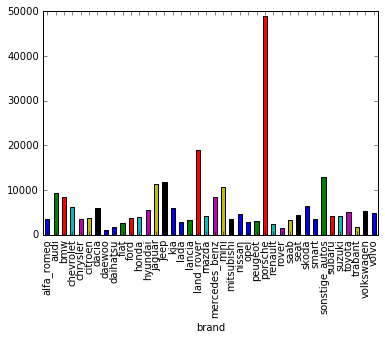

In [26]:
autos.groupby('brand').price.mean().plot.bar()

We will also check the most common brands and also will plot them accordingly

volkswagen        0.212631
bmw               0.109778
opel              0.109459
mercedes_benz     0.093350
audi              0.087362
ford              0.069719
renault           0.048816
peugeot           0.030236
fiat              0.025974
seat              0.019433
skoda             0.016407
mazda             0.015576
nissan            0.015555
smart             0.014702
citroen           0.014170
toyota            0.012806
hyundai           0.010206
volvo             0.008821
mini              0.008800
mitsubishi        0.008310
honda             0.008033
kia               0.007309
sonstige_autos    0.006776
alfa_romeo        0.006392
suzuki            0.006009
porsche           0.005220
chevrolet         0.005135
chrysler          0.003473
dacia             0.002749
daihatsu          0.002557
jeep              0.002195
subaru            0.002046
land_rover        0.002024
daewoo            0.001598
saab              0.001598
jaguar            0.001470
rover             0.001385
l

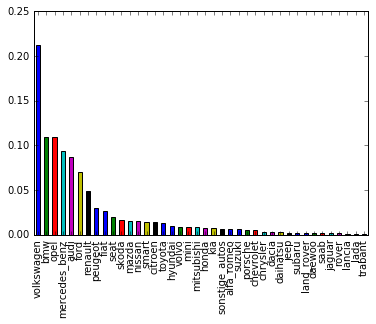

In [27]:
print(autos['brand'].value_counts(normalize=True))
autos['brand'].value_counts(normalize=True).plot.bar()

Volkswagen tops the most common brand followed by BMW. Upon observation, it is also evident that top common brand are german brands, which makes perfect sense since this dataset comes from a german website.

We will have to find the average price for the most common brands. For that, we will first create a new series containing only the brands that represent more than 5% of total of cars.

In [28]:
brand_count = autos['brand'].value_counts(normalize=True)
popular_brands = brand_count[brand_count > 0.05].index
print(popular_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


We will continue our analysis by looping through the most common brands and store the average price for each one in a dicionary. The dictionary's keys are the names of the brands and its values are the average price for that brand.

Finally we'll use display_table() function to display the dictionary in a more readable way.

In [29]:
top_brand_mean_prices = {}

def display_table(table):   
    table_display = []
    for key in table:
        key_tuple = (table[key], key)
        table_display.append(key_tuple)
    table_sorted = sorted(table_display, reverse=True)
    for tuple in table_sorted:
        print(tuple[1], ':', tuple[0])

for brands in popular_brands:
    brand = autos[autos['brand'] == brands]
    mean_price = brand['price'].mean()
    top_brand_mean_prices[brands] = round(mean_price, 2)
    
display_table(top_brand_mean_prices)

audi : 9337.96
mercedes_benz : 8512.95
bmw : 8337.67
volkswagen : 5360.72
ford : 3766.92
opel : 2950.09


From the above results, Audi is the most expensive one and Opel is the least one.

Let's continue our analysis to check on the average mileage for the most common brands. We'll again use the display_table() function.

In [30]:
top_brand_mean_mileage = {}

for brands in popular_brands:
    brand = autos[autos['brand'] == brands]
    mean_mileage = brand['odometer_km'].mean()
    top_brand_mean_mileage[brands] = round(mean_mileage, 2)

display_table(top_brand_mean_mileage)

bmw : 132920.23
mercedes_benz : 131111.62
opel : 130042.83
volkswagen : 129443.33
audi : 129436.59
ford : 125365.22


BMW hits the top mileage while ford with lowest mileage

Let's aggregate all these informations into a new DataFrame. First we use the Series constructor to convert the dictionaries into Series

In [31]:
s_price = pd.Series(top_brand_mean_prices)
s_mileage = pd.Series(top_brand_mean_mileage)

We will convert the first series into a DataFrame and then will add the second series as a column to this new Dataframe and display accordigly

In [32]:
price_mileage = pd.DataFrame(s_price, columns=['mean_price'])
price_mileage['mean_mileage'] = s_mileage
price_mileage

,mean_price,mean_mileage
audi,9337.96,129436.59
bmw,8337.67,132920.23
ford,3766.92,125365.22
mercedes_benz,8512.95,131111.62
opel,2950.09,130042.83
volkswagen,5360.72,129443.33


Let's plot visualization on this Dataframe

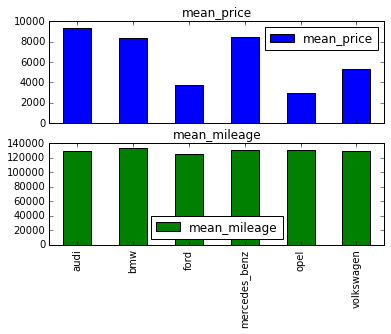

In [33]:
price_mileage.plot.bar(subplots=True);

The average mileage is pretty much same for most common brands, while there is a big variation in the average price.

In order to proceed further on this, we will analyse the impact of the mileage in the average price. To do this, we'll first check the distinct mileage values once again meaning that we will work again on the entire dataset.

In [34]:
autos['odometer_km'].sort_values(ascending=False).unique()

array([150000, 125000, 100000,  90000,  80000,  70000,  60000,  50000,
        40000,  30000,  20000,  10000,   5000])

There are only 13 (rounded) values which we can consider them as the references instead of splitting them into intervals.

We will now plot a visulization for average price per mileage

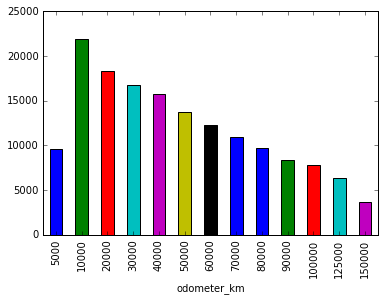

In [35]:
autos.groupby('odometer_km').price.mean().plot.bar()

For  several reasons, cars with the lowest mileage values are ones with the lowest average price, which is odd.The reasons could be anything.

If we clearly observe the bar plot, the lowest the mileage, the highest the average price, which really makes sense.

Finally, we will see how much the 'unrepaired_damage' and 'gearbox' columns affect the average price. We'll again use DataFrame.groupby for this operation.

unrepaired_damage
no     7051.14
yes    2224.64
Name: price, dtype: float64


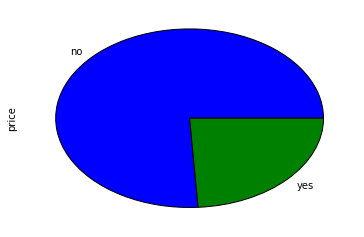

In [36]:
print(round(autos.groupby('unrepaired_damage').price.mean(),2))
autos.groupby('unrepaired_damage').price.mean().plot.pie()

gearbox
automatic    10884.20
manual        4638.17
Name: price, dtype: float64


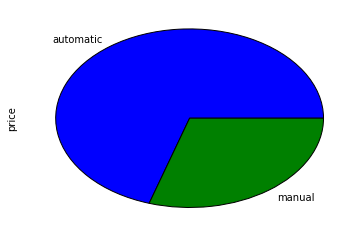

In [37]:
print(round(autos.groupby('gearbox').price.mean(),2))
autos.groupby('gearbox').price.mean().plot.pie()

It is evident that cars with no damage cost, in average, almost thrice more than damaged cars. 

Similarly, cars with automatic transmission cost, in average almost twice more than manual transmissions

## Conclusion

We have come a long way in this project, starting from cleaning the dataset to performing some analysis on the same.  I believe all the project objectives are fullfilled